# Monte Carlo Ising Model

I have written a code in order to simulate magnetic properties of lattice atoms or molecules in 2-dimension using Ising Model, and determined the Curie temperature for an arbitrary material with the help of the Monte Carlo methods.

In the Ising Model, dipoles either point up or down,


$$s_i=\begin{cases}
1 & \mathrm{if \: pointing \: up} \\
-1 & \mathrm{if \: pointing \: down} 
\end{cases}$$

Therefore, their interaction energies can be modeled as follow

$$U=\sum_{\substack{\mathrm{all \: neighboring \\ \: pairs} \: i,j}} -\epsilon s_i s_j$$

Then, we can find the average magnetization (in terms of magnetic dipole moments) by using the partition function of the system. 

$$Z=\sum e^{-U/kT}$$

$$ \substack{\mathrm{average\: \\ magnetization}}=\bar{S}=\frac{1}{Z} \sum S e^{-U/kT} \qquad \mathrm{where} \qquad S= \sum s_i$$ 

## Some explanations of the code
 

In order to cope with the physical constants, certain dimensionless parameters are defined; 

$$x\equiv \frac{kT}{\epsilon}$$

$$\mathrm{interactions} \equiv  \frac{U}{\epsilon} =\sum_{\substack{\mathrm{all \: neighboring \\ \: pairs} \: i,j}} - s_i s_j,$$

then, the Boltzman factor becomes;

$$\Large e^{-\frac{interactions}{x}}. $$


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
#plt.rcParams['figure.figsize'] = [10, 6]

In [15]:
def average_magnetization(x,N):
    
    z=0 #partition function
    mag_fac=0.0 #magnetization factor
    for k in range(int(1e3)): #takes 1000 random states and calculate the average using them

        s=np.random.randint(0,2,size=(N,N)) #generates random magnetic dipole moments (NxN matrix with
        s=2*s-1                             #elements only 1 and -1)

        #calculates interaction energy
        
        interactions=0.0  #U/epsilon
        
        for i in range(N-1):
            for j in range (N-1):
                interactions=interactions-s[i,j]*s[i,j+1]
        
        for i in range(N-1):
            for j in range (N-1):
                interactions=interactions-s[j,i]*s[j+1,i]
        
        bf=np.exp(1/x*interactions)  #boltzman factor
        z=z+bf                       #partition function
        mag=np.sum(s) #total magnetizaton in terms of mu/v
        mag_fac=mag_fac+mag*bf #magnetization x boltzman factor

    ave_mag=mag_fac/z
    return ave_mag

The code below finds the average magnetization for different temperatures and draws it

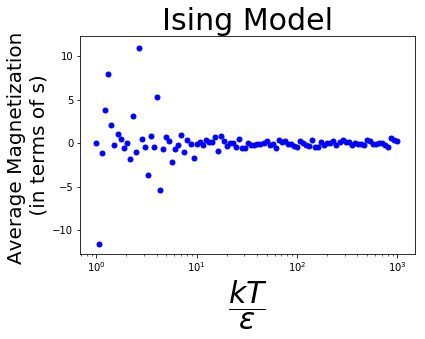

In [16]:
N=10

fig,mc_1=plt.subplots()
mc_1.set_title("Ising Model", size=30) 
mc_1.set_ylabel("Average Magnetization \n (in terms of s) ", fontsize = 20.0) 
mc_1.set_xlabel("$\\dfrac{kT}{\epsilon}$", fontsize = 30) 
mc_1.set(xscale="log")

for x in np.geomspace(1.0, 1e3, num=100,dtype=float):
    mc_1.scatter(x,average_magnetization(x,N),marker=".",c="b",s=100)


We can see from the graph above that the Curie Temperature is less than 8 , but there is a better algorithm to find it called  Metropolis.

## Metropolis Algorithm

Metropolis Algorithm Function Definition

In [17]:
def metropolis(s,N,x):         # computes the energy difference in case we flip a dipole ,
                               # then, if the energy difference is negative, flips it; if it is positive, decides for 
                               # flipping according to relative  Boltzman factors. Iterates 100  times per dipole     
    for k in range(100*N**2):        
            
        i=np.random.randint(0,N)   #choose random dipole
        j=np.random.randint(0,N)
    
        if i==0:
            top=s[N-1,j]
        else:
            top=s[i-1,j]
        if i==N-1:
            bottom=s[0,j]
        else:
            bottom=s[i+1,j]
        if j==0:
            left=s[i,N-1]
        else:
            left=s[i,j-1]
        if j==N-1:
            right=s[i,0]
        else:
            right=s[i,j+1]
    
        d_interactions=2.0*s[i,j]*(top+bottom+left+right)  # Energy Difference
            
        if d_interactions<=0:
            s[i,j]=-s[i,j]
        else:
            if random.random()<=math.exp(-d_interactions/x):
                s[i,j]=-s[i,j]
        
    return s

The following part of the code, generates a random initial state, iterates it for different temperatures and draws the results.

The dipoles pointing up are represented by the red circles ,and pointing down with the blue ones. 

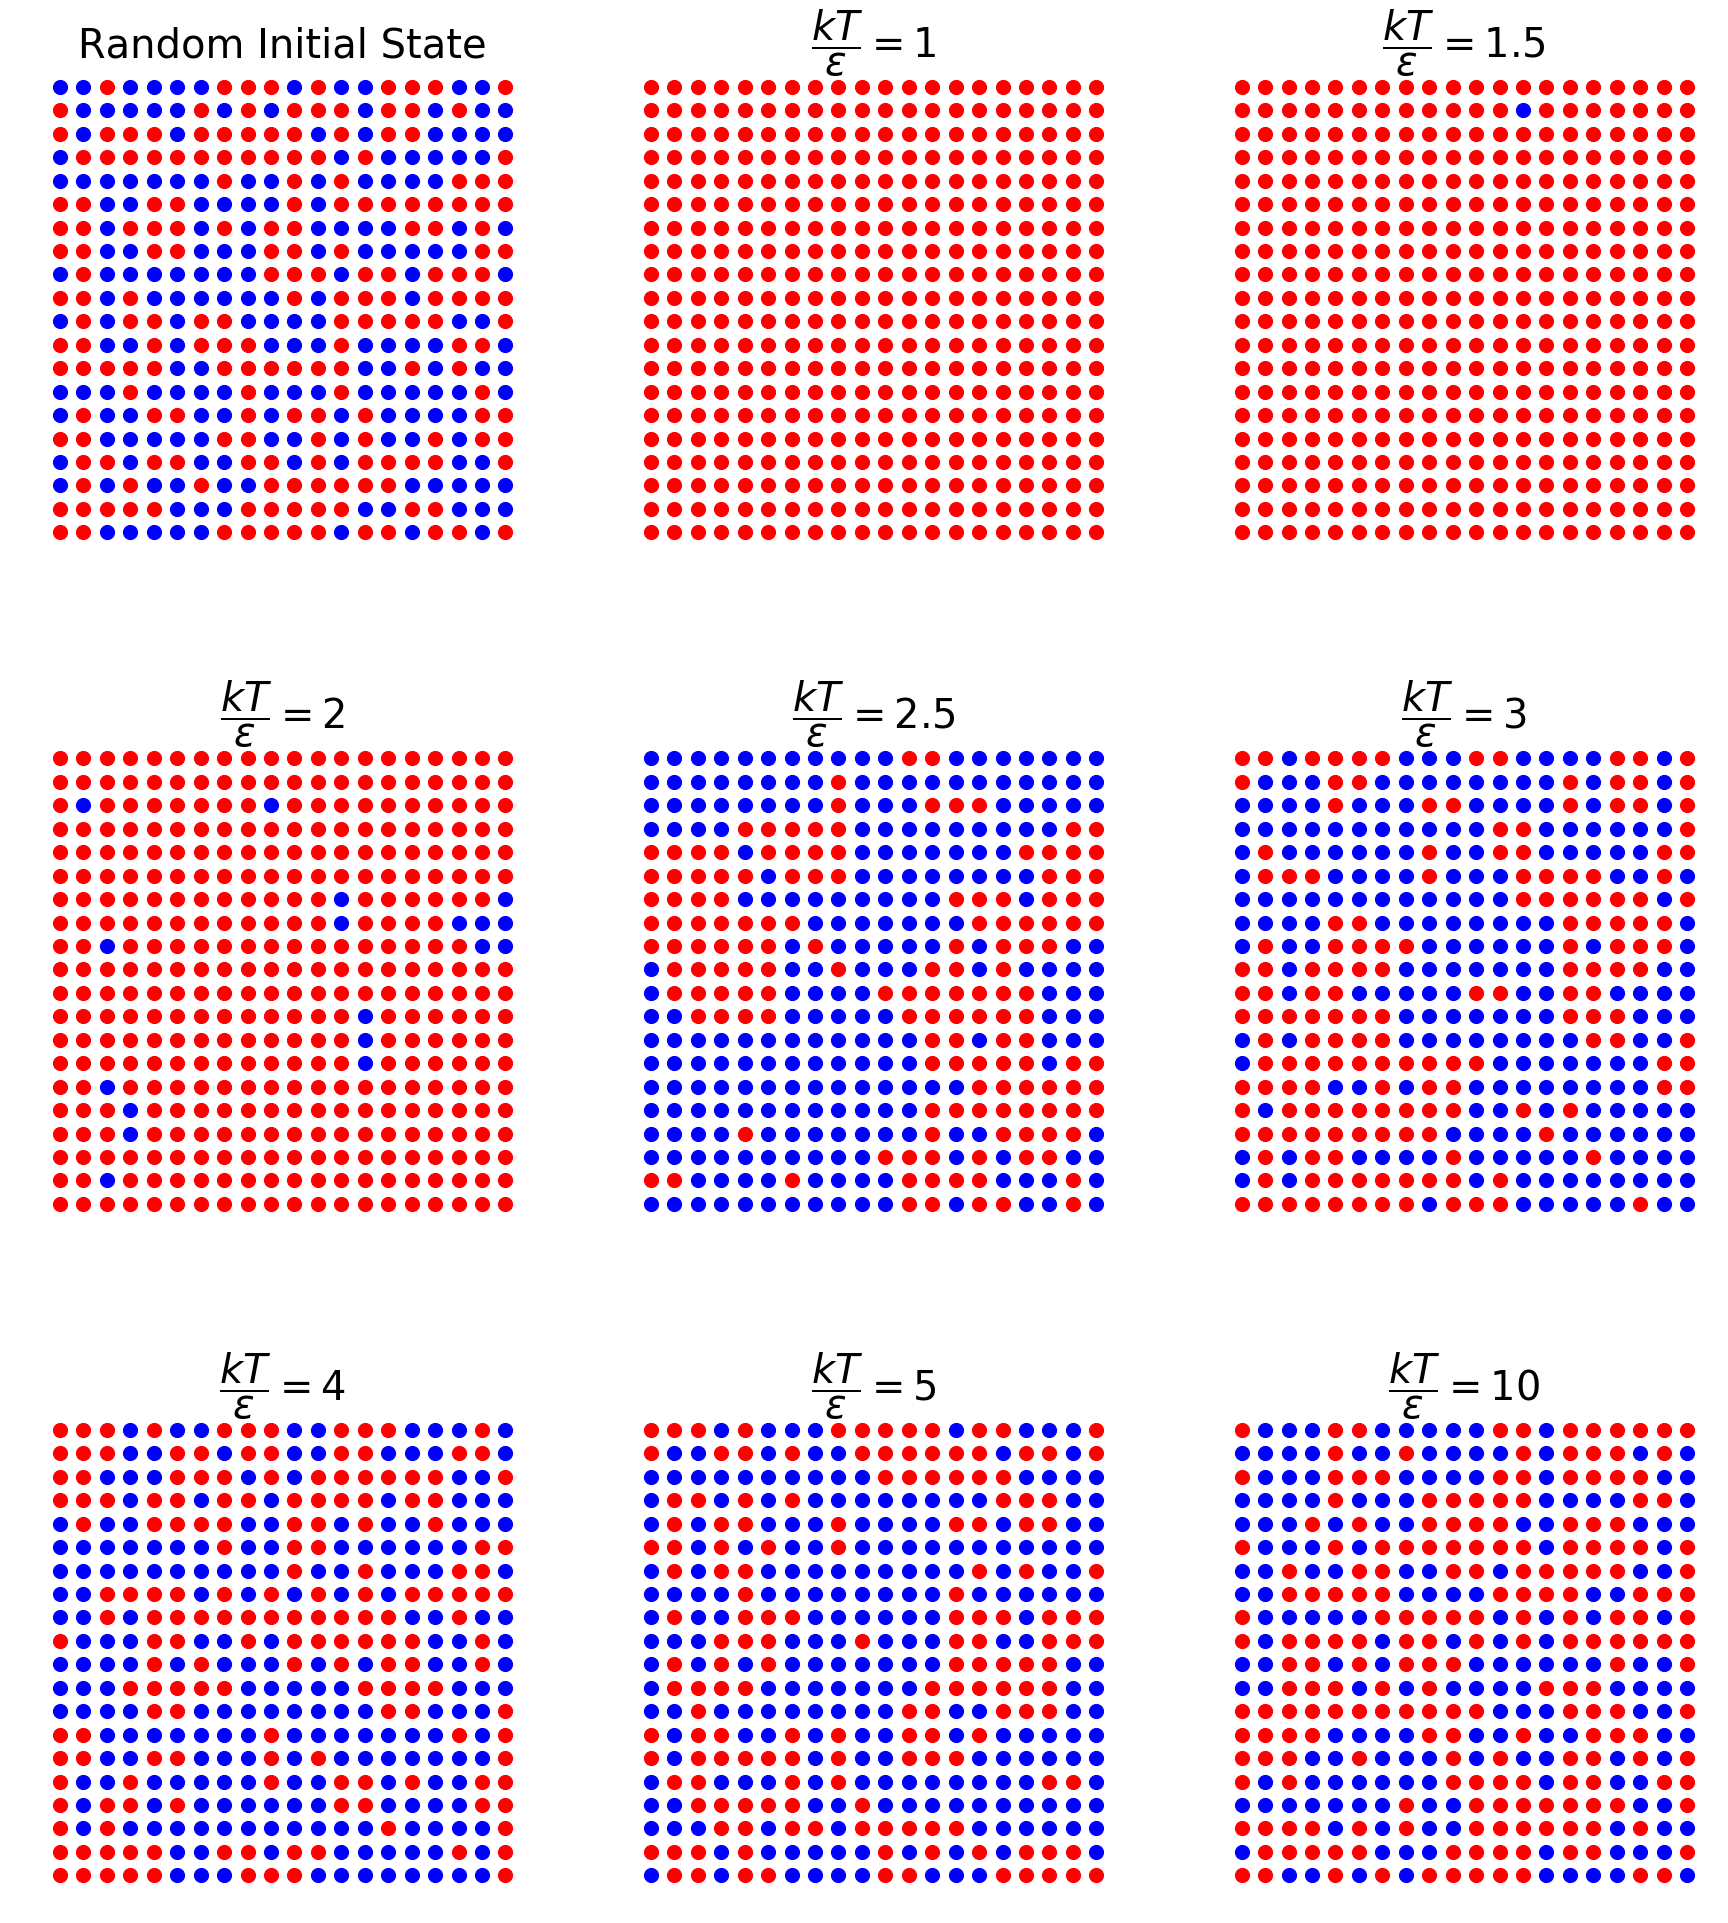

In [18]:
N=20

s=np.random.randint(0,2,size=(N,N))
s=2*s-1

fig,((mc_2,mc_3,mc_4),(mc_5,mc_6,mc_7),(mc_8,mc_9,mc_10))=plt.subplots(3,3,figsize=(30,35))
plt.subplots_adjust(wspace=0.2, hspace=0.20)
mc_2.axis('equal')
mc_2.set_title("Random Initial State",fontsize=40)
mc_2.axis("off")
mc_2.set_aspect('equal',adjustable='box')
mc_2.set_xlim([-1, N])
mc_2.set_ylim([-1, N])

mc_3.axis('equal')
mc_3.set_title("$\\dfrac{kT}{\epsilon}=1$",fontsize=40)
mc_3.axis("off")
mc_3.set_aspect('equal',adjustable='box')
mc_3.set_xlim([-1, N])
mc_3.set_ylim([-1, N])

mc_4.axis('equal')
mc_4.set_title("$\\dfrac{kT}{\epsilon}=1.5$",fontsize=40)
mc_4.axis("off")
mc_4.set_aspect('equal',adjustable='box')
mc_4.set_xlim([-1, N])
mc_4.set_ylim([-1, N])

mc_5.axis('equal')
mc_5.set_title("$\\dfrac{kT}{\epsilon}=2$",fontsize=40)
mc_5.axis("off")
mc_5.set_aspect('equal',adjustable='box')
mc_5.set_xlim([-1, N])
mc_5.set_ylim([-1, N])

mc_6.axis('equal')
mc_6.set_title("$\\dfrac{kT}{\epsilon}=2.5$",fontsize=40)
mc_6.axis("off")
mc_6.set_aspect('equal',adjustable='box')
mc_6.set_xlim([-1, N])
mc_6.set_ylim([-1, N])

mc_7.axis('equal')
mc_7.set_title("$\\dfrac{kT}{\epsilon}=3$",fontsize=40)
mc_7.axis("off")
mc_7.set_aspect('equal',adjustable='box')
mc_7.set_xlim([-1, N])
mc_7.set_ylim([-1, N])

mc_8.axis('equal')
mc_8.set_title("$\\dfrac{kT}{\epsilon}=4$",fontsize=40)
mc_8.axis("off")
mc_8.set_aspect('equal',adjustable='box')
mc_8.set_xlim([-1, N])
mc_8.set_ylim([-1, N])

mc_9.axis('equal')
mc_9.set_title("$\\dfrac{kT}{\epsilon}=5$",fontsize=40)
mc_9.axis("off")
mc_9.set_aspect('equal',adjustable='box')
mc_9.set_xlim([-1, N])
mc_9.set_ylim([-1, N])

mc_10.axis('equal')
mc_10.set_title("$\\dfrac{kT}{\epsilon}=10$",fontsize=40)
mc_10.axis("off")
mc_10.set_aspect('equal',adjustable='box')
mc_10.set_xlim([-1, N])
mc_10.set_ylim([-1, N])



for i in range(N):
    for j in range(N):
        if s[i,j]==1:
            mc_2.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_2.scatter(i,j,marker="o",c="b",s=200)

x=1.0 #must be real

ss=np.arange(N*N).reshape(N,N)
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            

for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_3.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_3.scatter(i,j,marker="o",c="b",s=200)
x=1.5 #must be real
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            
for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_4.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_4.scatter(i,j,marker="o",c="b",s=200)

x=2.0 #must be real
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            

for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_5.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_5.scatter(i,j,marker="o",c="b",s=200)

x=2.5 #must be real
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            

for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_6.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_6.scatter(i,j,marker="o",c="b",s=200)
            
x=3.0 #must be real
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            

for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_7.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_7.scatter(i,j,marker="o",c="b",s=200)
            
x=4.0 #must be real
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            

for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_8.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_8.scatter(i,j,marker="o",c="b",s=200)
            
x=5.0 #must be real
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            

for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_9.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_9.scatter(i,j,marker="o",c="b",s=200)
            
x=10.0 #must be real
np.copyto(ss,s)
sss=metropolis(ss,N,x)
            

for i in range(N):
    for j in range(N):
        if sss[i,j]==1:
            mc_10.scatter(i,j,marker="o",c="r",s=200)
        else:
            mc_10.scatter(i,j,marker="o",c="b",s=200)
            

            

As we can infer from the figures, the total magnetization gets random, hence aproximately zero in the interval of temperatures 2 and 2.5 (in terms of $\epsilon/k$). Thus, the Curie Temperature lies in that interval.